Loading data...
Generating plot...


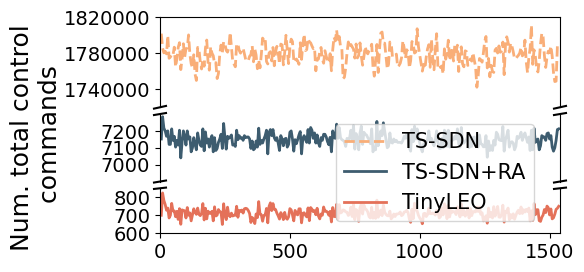

Done!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_command_comparison(ts_sdn_overhead, tiny_leo_overhead, output_dir):
    timestamps = sorted(ts_sdn_overhead.keys())
    times = [t * 5 for t in timestamps]  # Convert to minutes

    # Collect data
    ts_sdn_aggregated = []
    ts_sdn_normal = []
    tiny_leo_commands = []

    for t in timestamps:
        aggregated_commands = sum(
            stats['deleted_isls'] + stats['added_isls'] +
            stats['deleted_aggregated_routes'] + stats['added_aggregated_routes']
            for stats in ts_sdn_overhead[t]['detailed_stats'].values()
        )
        ts_sdn_aggregated.append(aggregated_commands)

        normal_commands = sum(
            stats['deleted_isls'] + stats['added_isls'] +
            stats['deleted_routes'] + stats['added_routes']
            for stats in ts_sdn_overhead[t]['detailed_stats'].values()
        )
        ts_sdn_normal.append(normal_commands)

        tiny_commands = len(tiny_leo_overhead[t]['messages'])
        tiny_leo_commands.append(tiny_commands)

    # Create 3 vertically stacked subplots with shared x-axis
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5, 3),
                                      height_ratios=[2, 1.5, 1])

    # Plot each line only once and save handles for legend
    l1, = ax1.plot(times, ts_sdn_normal, color='#F9AE78', linewidth=2, linestyle='--')
    l2, = ax1.plot(times, ts_sdn_aggregated, color='#3D5C6F', linewidth=2)
    l3, = ax1.plot(times, tiny_leo_commands, color='#E47159', linewidth=2)

    # Repeat plots on ax2 and ax3 for visual continuity
    for ax in [ax2, ax3]:
        ax.plot(times, ts_sdn_normal, color='#F9AE78', linewidth=2, linestyle='--')
        ax.plot(times, ts_sdn_aggregated, color='#3D5C6F', linewidth=2)
        ax.plot(times, tiny_leo_commands, color='#E47159', linewidth=2)

    # Set y-limits and y-ticks
    ax1.set_ylim(1720000, 1820000)
    ax1.set_yticks([1740000, 1780000, 1820000])
    ax1.set_yticklabels(['1740000', '1780000', '1820000'])

    ax2.set_ylim(6900, 7300)
    ax2.set_yticks([7000, 7100, 7200])
    ax2.set_yticklabels(['7000', '7100', '7200'])

    ax3.set_ylim(600, 850)
    ax3.set_yticks([600, 700, 800])
    ax3.set_yticklabels(['600', '700', '800'])

    # Hide spines to create break effect
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax3.spines['top'].set_visible(False)

    # Set x-ticks visibility
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False, top=False)
    ax2.tick_params(labeltop=False, top=False, bottom=False)
    ax3.xaxis.tick_bottom()

    # Draw break marks
    d = .015  # size of diagonal lines
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d, +d), (-d, +d), **kwargs)
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax3.transAxes)
    ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    ax3.set_xlim(0, 1540)

    # Set tick label size
    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis='both', which='major', labelsize=14)

    # Set global y-label
    f.text(-0.15, 0.52, "Num. total control\n      commands", va='center',
           rotation='vertical', fontsize=18, fontweight='normal')

    # Add shared legend
    f.legend(handles=[l1, l2, l3], labels=['TS-SDN', 'TS-SDN+RA', 'TinyLEO'],
             ncol=1, fontsize=15,
             loc='upper center', bbox_to_anchor=(0.7, 0.6))

    # Adjust spacing and save
    plt.subplots_adjust(hspace=0.1, left=0.15, right=0.95, top=0.92, bottom=0.2)
    plt.rcParams['pdf.fonttype'] = 42

    plt.savefig(os.path.join(output_dir, 'figure17c.pdf'), bbox_inches='tight')
    plt.savefig(os.path.join(output_dir, 'figure17c.png'), dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    input_dir = "data"
    output_dir = "figures"
    os.makedirs(output_dir, exist_ok=True)

    print("Loading data...")
    ts_sdn_overhead = np.load(os.path.join(input_dir, "ts_sdn_overhead_573_11_11_distancedt_global_max_new.npy"),
                              allow_pickle=True).item()
    tiny_leo_overhead = np.load(os.path.join(input_dir, "tiny_leo_overhead_573_11_11_distancedt_global_max_new.npy"),
                                allow_pickle=True).item()

    print("Generating plot...")
    plot_command_comparison(ts_sdn_overhead, tiny_leo_overhead, output_dir)
    print("Done!")


Loading data...
Generating plot...


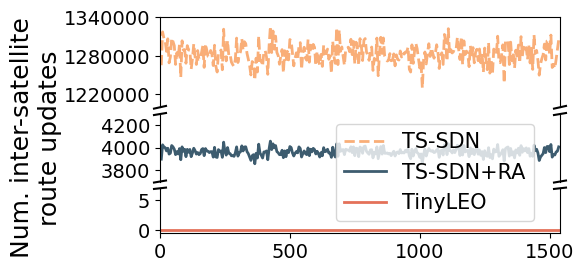

Done!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_route_updates(ts_sdn_overhead, output_dir):
    timestamps = sorted(ts_sdn_overhead.keys())
    times = [t * 5 for t in timestamps]  # Convert to minutes

    # Collect route update counts
    ts_sdn_updates_agg = []
    ts_sdn_updates_normal = []

    for t in timestamps:
        total_updates_agg = sum(
            max(stats['deleted_aggregated_routes'], stats['added_aggregated_routes'])
            for stats in ts_sdn_overhead[t]['detailed_stats'].values()
        )
        ts_sdn_updates_agg.append(total_updates_agg)

        total_updates_normal = sum(
            max(stats['deleted_routes'], stats['added_routes'])
            for stats in ts_sdn_overhead[t]['detailed_stats'].values()
        )
        ts_sdn_updates_normal.append(total_updates_normal)

    # Create 3 vertically stacked subplots with shared x-axis
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5, 3),
                                      height_ratios=[2, 1.5, 1])

    # Plot data and store handles for legend
    l1, = ax1.plot(times, ts_sdn_updates_normal, color='#F9AE78', linewidth=2, linestyle='--')
    l2, = ax1.plot(times, ts_sdn_updates_agg, color='#3D5C6F', linewidth=2)
    l3, = ax1.plot(times, [0] * len(times), color='#E47159', linewidth=2)

    # Repeat plots on lower subplots for visual continuity
    for ax in [ax2, ax3]:
        ax.plot(times, ts_sdn_updates_normal, color='#F9AE78', linewidth=2, linestyle='--')
        ax.plot(times, ts_sdn_updates_agg, color='#3D5C6F', linewidth=2)
        ax.plot(times, [0] * len(times), color='#E47159', linewidth=2)

    # Set y-axis limits and ticks
    ax1.set_ylim(1200000, 1340000)
    ax1.set_yticks([1220000, 1280000, 1340000])
    ax1.set_yticklabels(['1220000', '1280000', '1340000'])

    ax2.set_ylim(3700, 4300)
    ax2.set_yticks([3800, 4000, 4200])
    ax2.set_yticklabels(['3800', '4000', '4200'])

    ax3.set_ylim(-0.5, 7)
    ax3.set_yticks([0, 5])
    ax3.set_yticklabels(['0', '5'])

    # Hide axis spines between broken axes
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax3.spines['top'].set_visible(False)

    # Configure x-axis ticks
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False, top=False)
    ax2.tick_params(labeltop=False, top=False, bottom=False)
    ax3.xaxis.tick_bottom()

    # Draw diagonal break marks
    d = .015  # diagonal line size
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d, +d), (-d, +d), **kwargs)
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax3.transAxes)
    ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Set x-axis limits
    ax3.set_xlim(0, 1540)

    # Set tick label font size
    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis='both', which='major', labelsize=14)

    # Add global y-axis label
    f.text(-0.15, 0.52, "Num. inter-satellite\n    route updates", va='center',
           rotation='vertical', fontsize=18, fontweight='normal')

    # Add global legend
    f.legend(handles=[l1, l2, l3], labels=['TS-SDN', 'TS-SDN+RA', 'TinyLEO'],
             ncol=1, fontsize=15,
             loc='upper center', bbox_to_anchor=(0.7, 0.6))

    # Adjust spacing and layout
    plt.subplots_adjust(hspace=0.1, left=0.15, right=0.95, top=0.92, bottom=0.2)
    plt.rcParams['pdf.fonttype'] = 42

    # Save output figures
    plt.savefig(os.path.join(output_dir, 'figure17a.pdf'), bbox_inches='tight')
    plt.savefig(os.path.join(output_dir, 'figure17a.png'), dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    input_dir = "data"
    output_dir = "figures"
    os.makedirs(output_dir, exist_ok=True)

    print("Loading data...")
    ts_sdn_overhead = np.load(os.path.join(input_dir, "ts_sdn_overhead_573_11_11_distancedt_global_max_new.npy"),
                              allow_pickle=True).item()

    print("Generating plot...")
    plot_route_updates(ts_sdn_overhead, output_dir)

    print("Done!")


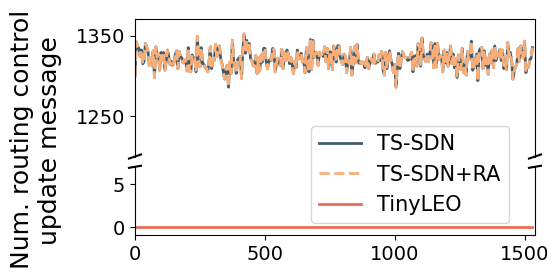

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 设置字体为 Arial
# plt.rcParams['font.family'] = 'Arial'
# 读取数据
all_changes = np.load("data/topology_changes_573_11_11_distancedt_global_max.npy", allow_pickle=True)
changes_data = [stat['changed_satellites'] for stat in all_changes[1:]]
time_points = np.arange(0, len(changes_data) * 5, 5)

# 创建对照数据
zero_data = np.zeros_like(changes_data)

# 创建两个子图，共享x轴
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 3), height_ratios=[2, 1])

# 在两个子图中绘制数据
for ax in [ax1, ax2]:

    l1,=ax.plot(time_points, changes_data, color='#3D5C6F', linewidth=2)
    l2,=ax.plot(time_points, changes_data, color='#F9AE78', linewidth=2,linestyle='--')
    l3,=ax.plot(time_points, zero_data, color='#E47159', linewidth=2)

# 设置y轴范围和刻度
ax1.set_ylim(1200, 1370)  # 上部分范围
ax2.set_ylim(-1, 7)      # 下部分范围

# 设置刻度
ax1.set_yticks([1250, 1350])
ax1.set_yticklabels(['1250', '1350'])

ax2.set_yticks([0, 5])
ax2.set_yticklabels(['0', '5'])

# 隐藏上下子图之间的边框
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False, top=False)
ax2.xaxis.tick_bottom()

# 添加断裂标记
d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

# 设置x轴
ax2.set_xlim(0, 1540)
# ax2.set_xlabel('Time (minute)', fontsize=16)

# 设置刻度大小
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=14)

# 调整子图间距和边距
plt.subplots_adjust(hspace=0.1, left=0.15, right=0.95, top=0.92, bottom=0.2)
# Set global y-label
f.text(-0.10, 0.52, "Num. routing control\n   update message", va='center',
       rotation='vertical', fontsize=18, fontweight='normal')

# Add shared legend
f.legend(handles=[l1, l2, l3], labels=['TS-SDN', 'TS-SDN+RA', 'TinyLEO'],
         ncol=1, fontsize=15,
         loc='upper center', bbox_to_anchor=(0.7, 0.6))
# 保存图片
plt.savefig('figures/figure17b.pdf', bbox_inches='tight')
plt.savefig('figures/figure17b.png', dpi=300, bbox_inches='tight')

plt.show()